```yaml
services:
  mage:
    image: mageai/mageai:latest
    command: mage start ${PROJECT_NAME}
    env_file:
      - .env
    build:
      context: .
      dockerfile: Dockerfile
    environment:
      USER_CODE_PATH: /home/src/${PROJECT_NAME}
      POSTGRES_DBNAME: ${POSTGRES_DBNAME}
      POSTGRES_SCHEMA: ${POSTGRES_SCHEMA}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
      POSTGRES_HOST: ${POSTGRES_HOST}
      POSTGRES_PORT: ${POSTGRES_PORT}
    ports:
      - 6789:6789
    volumes:
      - .:/home/src/
    restart: on-failure:5
  postgres:
    image: postgres:14
    restart: on-failure
    container_name: ${PROJECT_NAME}-postgres
    env_file:
      - .env
    environment:
      POSTGRES_DB: ${POSTGRES_DBNAME}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
    ports:
```

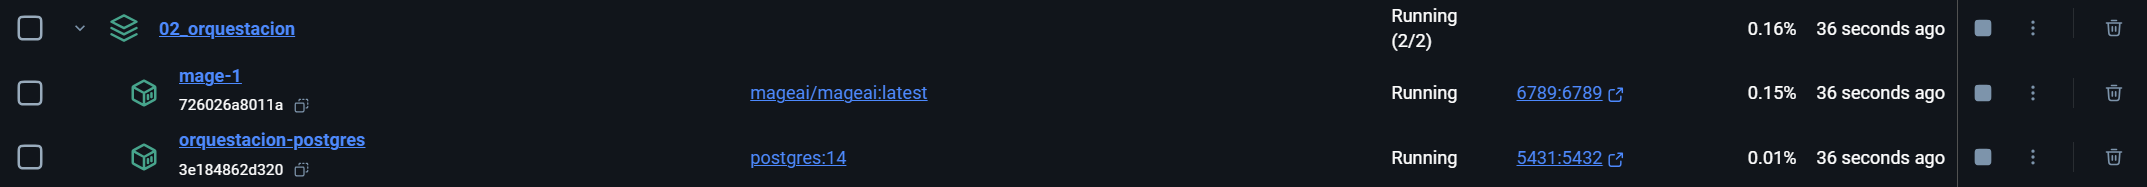

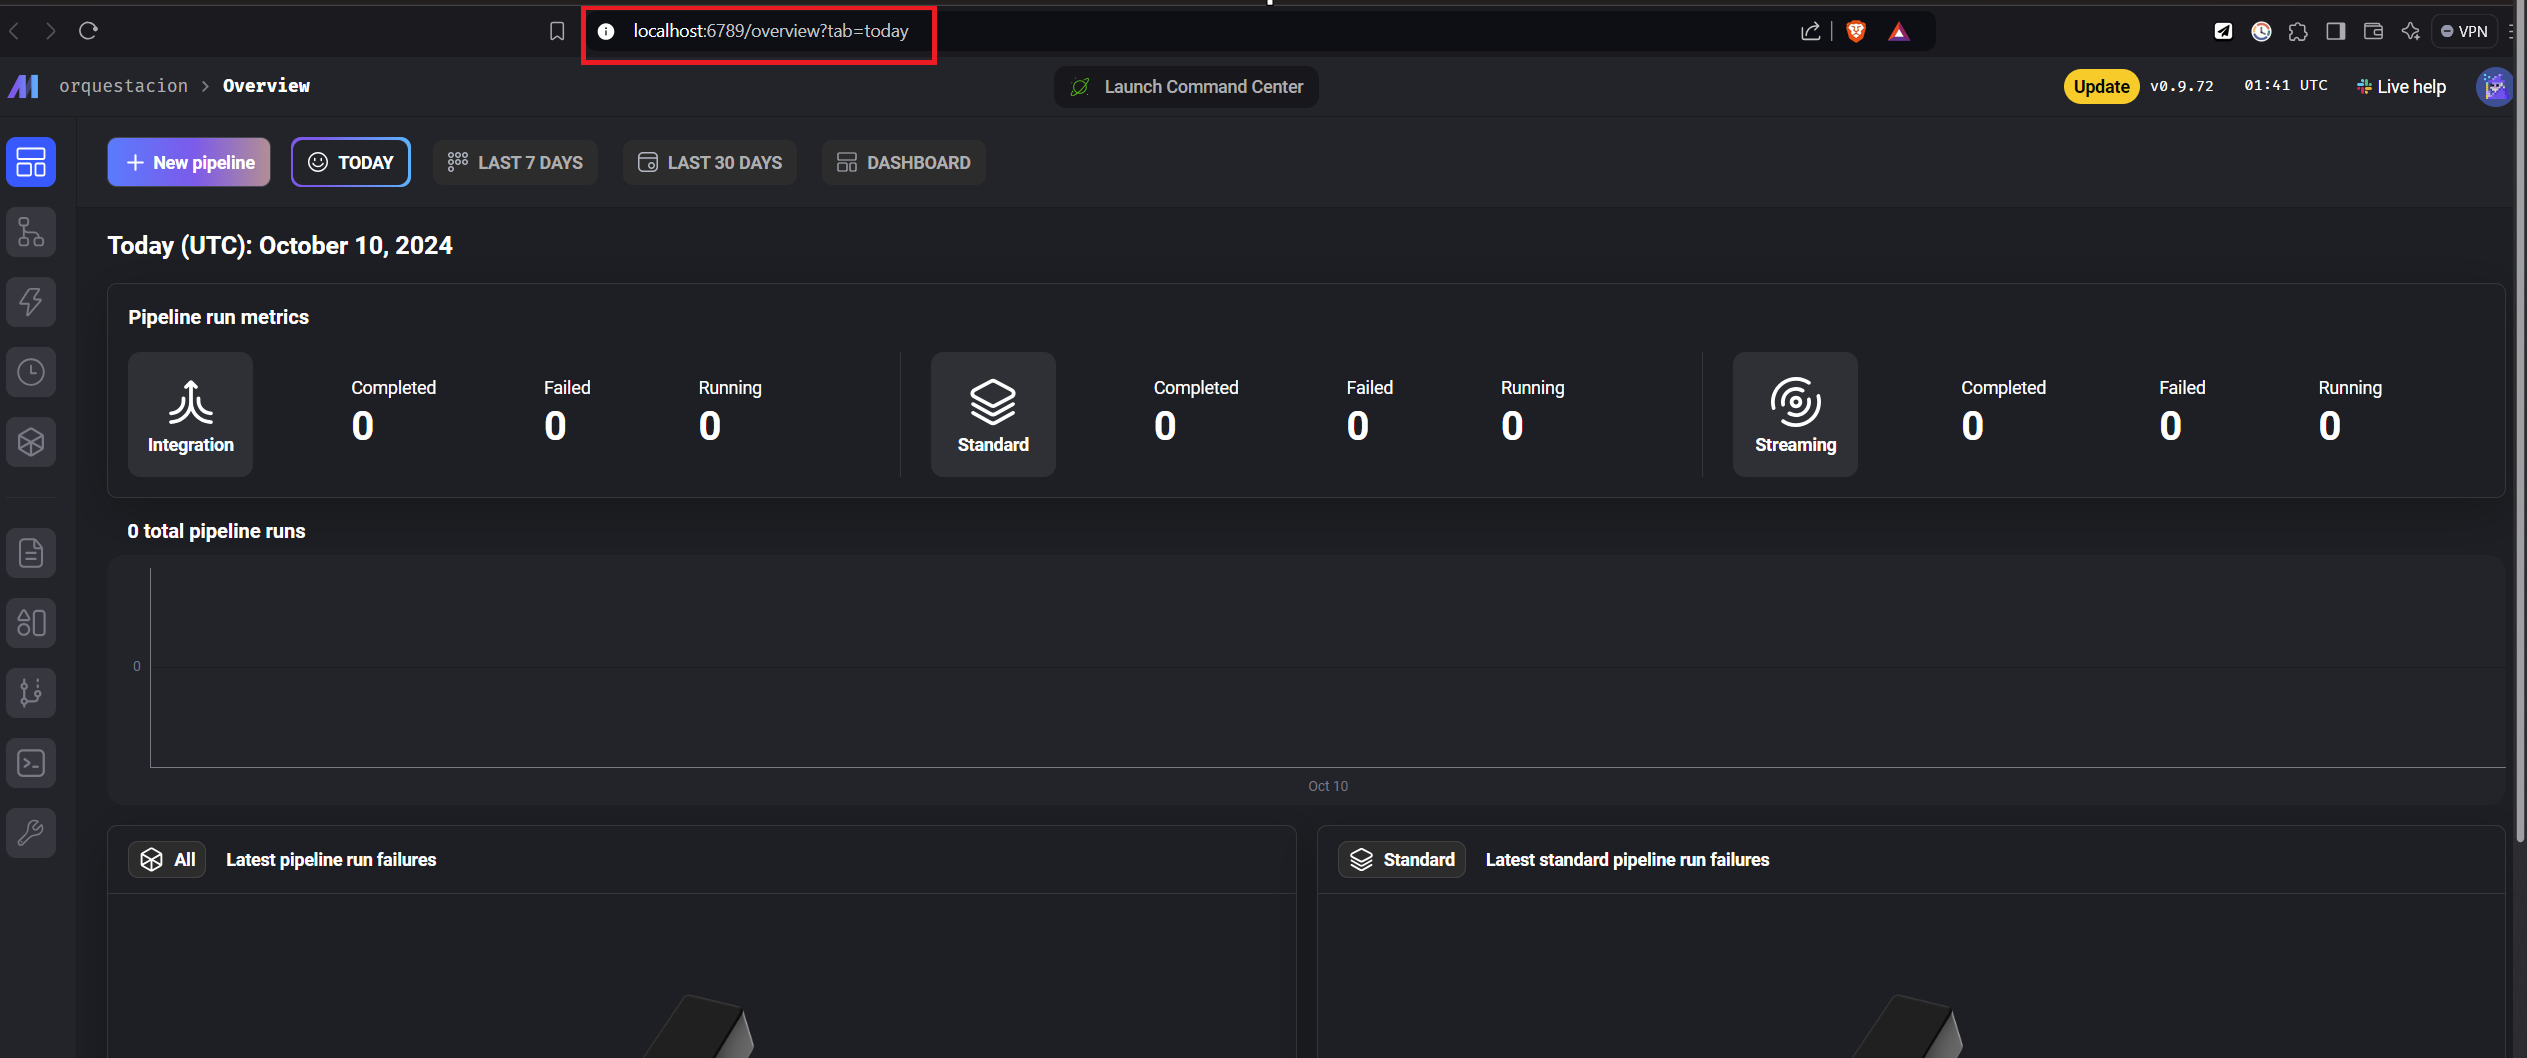

```yaml
POSTGRES_CONNECT_TIMEOUT: 10
POSTGRES_DBNAME: gtfs
POSTGRES_SCHEMA: public # Optional
POSTGRES_USER: postgres
POSTGRES_PASSWORD: 1234
POSTGRES_HOST: postgres
POSTGRES_PORT: 5432

```
Lo extrae de postgres

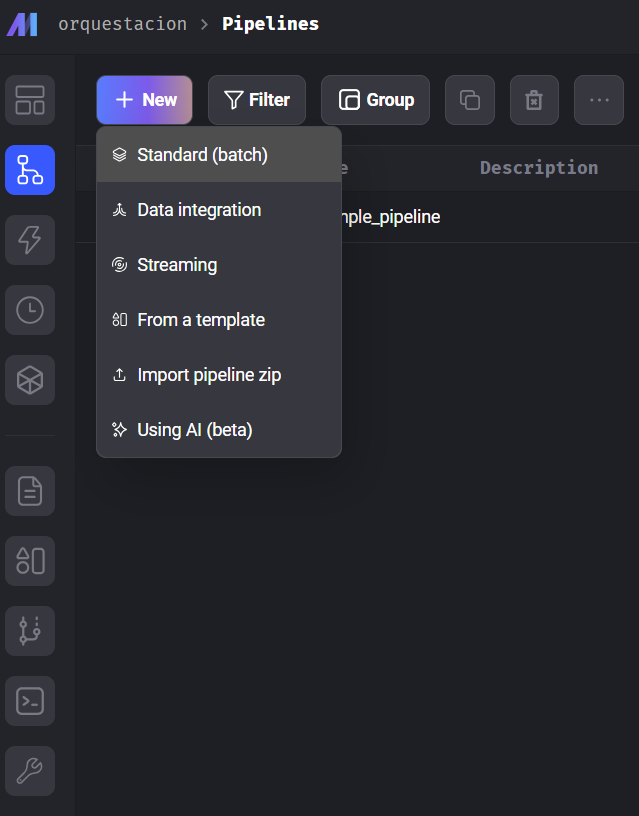

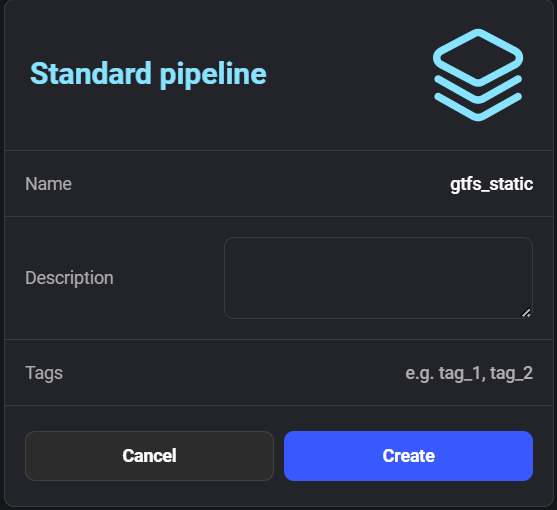

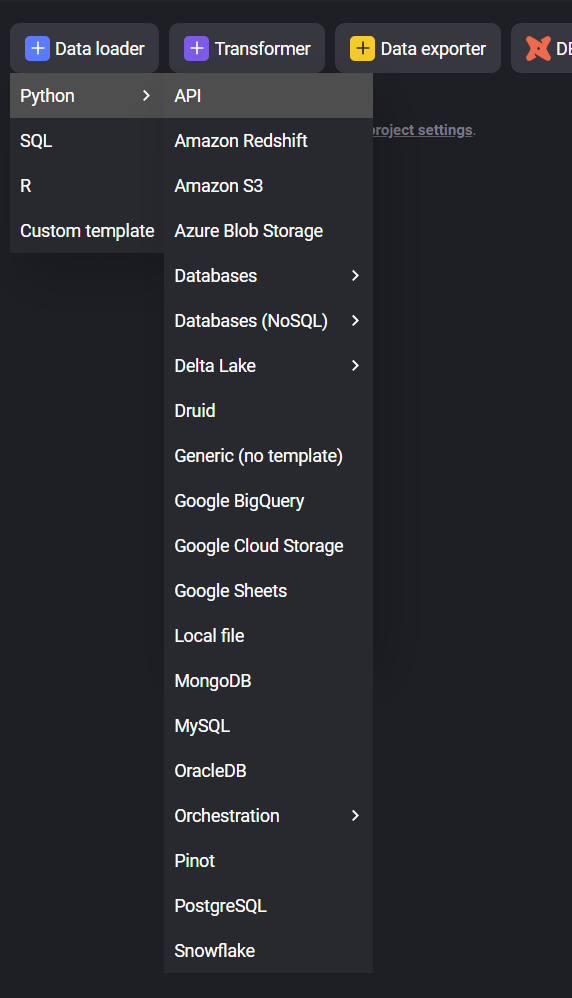